# Práctica 2 - Exploración de grafos de estado

## Ejercicio 1

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, se cuenta con un grifo. Las jarras se pueden llenar totalmente, vaciar en el piso y vaciar parcialmente el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente un litro de agua

### 1. ¿Cuáles son los estados del problema?

Los estados del problema se pueden definir de acuerdo a la cantidad de agua en cada jarra. En este escenario, definiremos que cada estado es una variación de un litro en cada una de las jarras. Definiendo la jarra de capacidad 3 como $J_3$ y la jarra de capacidad 5 como $J_5$, tenemos el siguiente espacio de opciones:

$$J_5 = \{0,1,2,3,4,5\}$$
$$J_3 = \{0,1,2,3\}$$

Para definir entonces cuales son los estados del problema, solo debemos hacer un producto cartesiano entre los espacios de opciones de cada jarra

$$E = J_3 \times J_5$$

Donde $E$ representa el espacio de estados

### 2. ¿Cuál es el tamaño del espacio de estados?

El tamaño del espacio del espacio de estados se calcula con la cardinalidad de $E$, como este es el producto cartesiano de dos conjuntos, para calcular su tamaño podemos sencillamente hallar el producto de la cardinalidad de los conjuntos que lo componen. Es decir:

$$|E| = |J_3 \times J_5| = |J_3| \cdot |J_5| = 4 \cdot 6 = 24$$

Con esto, podemos concluir que nuestro espacio tiene un total de 24 estados distintos

### 3. ¿Cuáles son las acciones?

Las acciones se pueden resumir en llenar las jarrad, intercambiar contenido entre estas y vaciar las jarras. Siendo más precisos, las acciones que se tienen son:

* Llenar la jarra de 5 litros.
* Llenar la jarra de 3 litros.
* Pasar el contenido de la jarra de 3 litros a la jarra de 5 litros.
* Pasar el contenido de la jarra de 5 litros a la jarra de 3 litros.
* Vaciar la jarra de 3 litros.
* Vaciar la jarra de 5 litros.

### 4. ¿Cuál podría ser el costo de una acción?

El costo de cada acción podría ser de acuerdo a lo que nos interese medir a largo plazo. Podemos tomar dos ejemplos, siendo el primero buscar una solución con un mínimo de acciones y siendo el segundo, aquel en el que se utilice una menor cantidad de agua. Para ello teniamos el siguiente esquema de costos en cada escenario:

1. **Mínimo de acciones**: Todas las acciones tienen costo 1
2. **Mínimo uso de agua**: Las primeras dos acciones tienen de costo $C-L$ donde $C$ representas la capacidad máxima de la jarra a llenar y $L$ la cantidad de líquido en dicho momento.


### 5. Defina el test de objetivo.

El test objetivo esta definido por poder medir 1 litro en alguna de las jarras. Por consiguiente, se puede definir el objetivo $O$ como el poder alcanzar algun estado que cumpla lo siguiente:

$$O = \{(a,b) \in E : a = 1 \vee b = 1 \}$$

### 6. Dado un estado inicial correspondiente a las dos jarras vacías, encuentre una solución al problema.

Para este ejercicio, vamos a diseñar el grafo completo (Dado que no tiene tantos estados), para poder identificar los estados inaccesibles del problema. Posteriormente, se hará una busqueda en anchura sobre el grafo para encontrar una solución al problema.

In [1]:
def getSuccessors(e):
    j3,j5 = e
    r = set()
    #Swap content
    toSwapJ3toJ5 = min(5-j5,j3)
    toSwapJ5toJ3 = min(3-j3,j5)
    r.add((j3 - toSwapJ3toJ5,j5 + toSwapJ3toJ5))
    r.add((j3 + toSwapJ5toJ3,j5 - toSwapJ5toJ3))
    #Fill jars
    r.add((j3,5))
    r.add((3,j5))
    #Empty jars
    r.add((j3,0))
    r.add((0,j5))
    #Avoid cycles
    if e in r: r.remove(e)
    return r

def isObjective(e):
    j3,j5 = e
    return j3==1 or j5==1

def getColor(e):
    j3,j5 = e
    if j3==0 and j5==0: return 'cyan'
    if isObjective(e): return 'green'
    return 'red'

def buildGraph():
    g = {}
    for i in range(6):
        for j in range(4):
            g[(j,i)] = getSuccessors((j,i))
    return g

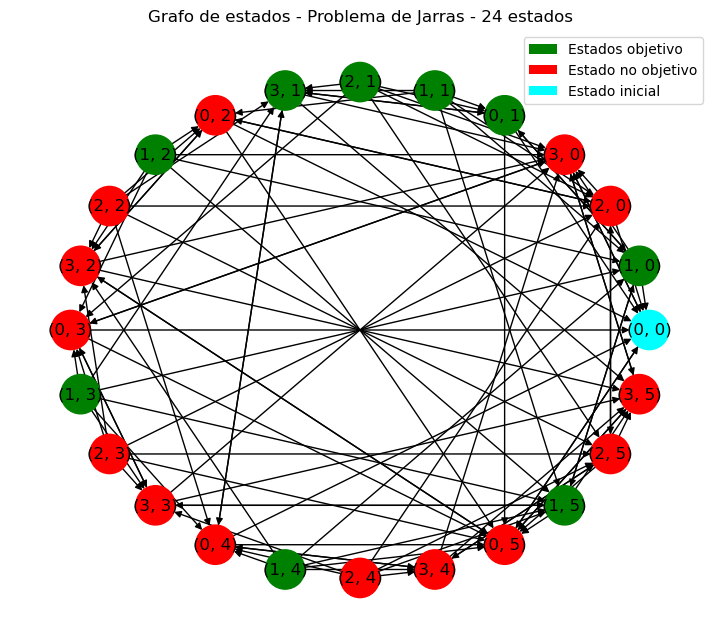

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

g = buildGraph()
G = nx.DiGraph(g)
pos = nx.circular_layout(G)
node_colors = [getColor(e) for e in G.nodes()]

plt.figure(figsize = (7,6))
nx.draw(G,pos,with_labels=True, node_size = 800, node_color = node_colors)
legend = [Patch(facecolor='green', label = 'Estados objetivo'),
          Patch(facecolor='red', label = 'Estado no objetivo'),
          Patch(facecolor='cyan', label = 'Estado inicial')]
plt.legend(handles = legend, loc='upper right')
plt.title(f'Grafo de estados - Problema de Jarras - {len(G.nodes())} estados')
plt.show()

Podemos ver que hay muchos arcos en el grafo y es dificil identificar cuales son accesibles y cual es no desde el estado inicial (0,0). Para identificar que nodos son accesibles o no desde nuestro estado inicial, se realizará una búsqueda en anchura.

In [3]:
def identifyReachable(g,init):
    assert init in g.keys()
    reachable = set()
    queue = [init]
    while len(queue)!=0:
        cur = queue.pop(0)
        if cur not in reachable:
            reachable.add(cur)
            queue+=list(g[cur])
    return reachable

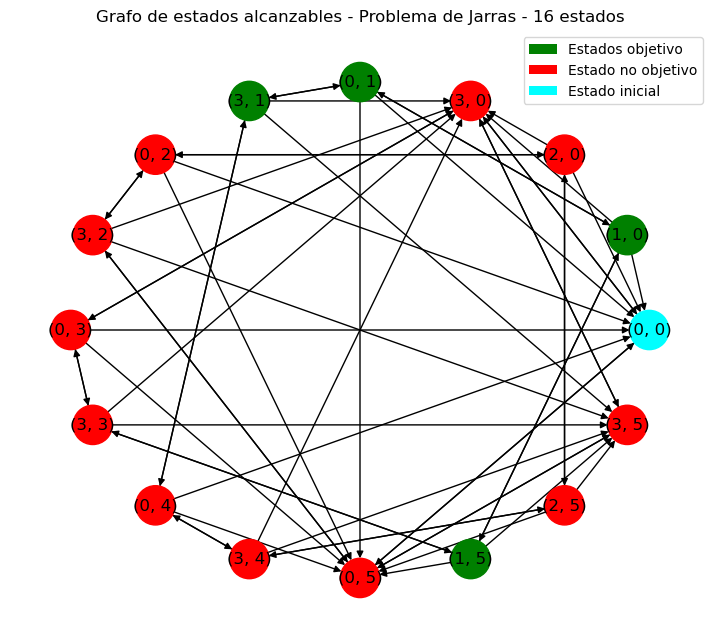

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

g = buildGraph()
reachable = identifyReachable(g,(0,0))
g = {a:b for a,b in g.items() if a in reachable}
G = nx.DiGraph(g)
pos = nx.circular_layout(G)
node_colors = [getColor(e) for e in G.nodes()]

plt.figure(figsize = (7,6))
nx.draw(G,pos,with_labels=True, node_size = 800, node_color = node_colors)
legend = [Patch(facecolor='green', label = 'Estados objetivo'),
          Patch(facecolor='red', label = 'Estado no objetivo'),
          Patch(facecolor='cyan', label = 'Estado inicial')]
plt.legend(handles = legend, loc='upper right')
plt.title(f'Grafo de estados alcanzables - Problema de Jarras - {len(G.nodes())} estados')
plt.show()

Con esto, podemos ver que desde el estado inicial, solo es posible alcanzar 16 de los 24 estados planteados en un inicio. Ya con esto en mente, se realizará una búsqueda en anchura para construir el camino

In [5]:
queue = [((0,0) , [(0,0)])]
covered = set()
path = None
while len(queue)>0:
    state , path = queue.pop(0)
    if isObjective(state):
        print(f'Solución de {len(path) - 1} acciones encontrada')
        break
    if state not in covered:
        for state in g[state]:
            queue.append( (state , path + [state]) )
if path is None: print(f'No se encontró solución')

Solución de 4 acciones encontrada


In [6]:
print(f'Solución encontrada')

for i, state in enumerate(path):
    j3,j5 = state
    print(f'{i+1}.  J3 = {j3}  J5 = {j5}')

Solución encontrada
1.  J3 = 0  J5 = 0
2.  J3 = 3  J5 = 0
3.  J3 = 0  J5 = 3
4.  J3 = 3  J5 = 3
5.  J3 = 1  J5 = 5


Finalmente, podemos dar solución al problema tras realizar la exploración de los estados y encontramos el paso a paso a seguir para poder alcanzarla.

## Ejercicio 2

Averigue sobre el problema de los misioneros y los caníbales y responda la preguntas 1 a 5. Encuentre
también una solución.

El problema de los misioneros y caníbales plantea lo siguiente:

>Tres misioneros y tres caníbales están en una orilla de un río y deben cruzarlo usando una canoa que solo puede transportar hasta dos personas a la vez. El desafío es que, en ningún momento, en ninguna de las orillas, los caníbales superen en número a los misioneros, ya que si esto ocurre, los caníbales se comerán a los misioneros. Adicionalmente, la canoa siempre debe llevar al menos una persona


### 1. ¿Cuáles son los estados del problema?

Los estados del problema estarán descritos por la cantidad de misioneros y canibales en las orillas y la posición de la canoa. De manera sencilla podemos fijarnos estrictamente en la cantidad de personas en una de las orillas y en la posición del barco. En este orden de ideas, podemos describir un estado como:

$$e = (M,C,P)$$

Donde $M$ es la cantidad de misioneros en la esquina izquierda, $C$ la cantidad de caníbales en la esquina izquierda y $P$ la posición de la canoa (Es decir si esta en la orilla izquierda o derecha).

$$M = \{0,1,2,3\}$$

$$C = \{0,1,2,3\}$$

$$P = \{I , D\}$$

Formalmente, describimos el espacio de estados $E$ como:

$$E = M \times C \times P$$

### 2. ¿Cuál es el tamaño del espacio de estados?

El tamaño del espacio de estados está descrito por el cardinalidad del conjunto resultante al producto cartesiano entre $M, $C$ y $P$. En ese orden de ideas, tenemos que:

$$|E| = |M \times C \times P| = |M| \cdot |C| \cdot |P| = 4 \cdot 4 \cdot 2 = 32$$

Lo que nos permite concluir que se tienen 32 estados posibles para este problema.

### 3. ¿Cuáles son las acciones?

Las acciones en este problema, se ven reflejadas al enviar personas de una de las orillas a la otra. En este escenario, tenemos estos posibles escenarios:

* Llevar 1 caníbal a la otra orilla
* Llevar 1 misionero a la otra orilla
* Llevar 1 misionero y 1 caníbal a la otra orilla.
* Llevar 2 caníbales a la otra orilla.
* Llevar 2 misioneros a la otra orilla.

### 4. ¿Cuál podría ser el costo de una acción?

El costo de una acción se podría representar en el mismo uso de la canoa. Eso sería un enfoque simplista; ya que todas las acciones tendrían eel mismo peso, que sería de 1.

### 5. Defina el test de objetivo.

El test objetivo se define como llevar a todos los misioneros y todos los caníbales a la otra orilla del río:

$$O = \{(x,y,z) \in E : x = 0 \wedge y = 0\}$$

### 6. Dado un estado inicial correspondiente a las dos jarras vacías, encuentre una solución al problema.

Para este ejercicio, vamos a diseñar el grafo completo (Dado que no tiene tantos estados), para poder identificar los estados inaccesibles del problema. Posteriormente, se hará una busqueda en anchura sobre el grafo para encontrar una solución al problema.

In [7]:
def isValid(e):
    M,C,P = e
    if (not P and C > M) or (P and 3-C > 3-M): return False
    return True

def getSuccessors(e):
    M,C,P = e
    r = set()
    if not isValid(e): return r
    #Get people on side
    if not P:
        m = 3-M
        c = 3-C
    else:
        m = M
        c = C
    #Two people of the same group
    if m>=2 and not P: r.add((M + 2, C, not P))
    elif m>=2 and P: r.add((M - 2, C, not P))
    if c>=2 and not P: r.add((M, C + 2, not P))
    elif c>=2 and P: r.add((M, C - 2, not P))
    #One of each group
    if c>=1 and m>=1 and P: r.add((M - 1, C - 1, not P))
    if c>=1 and m>=1 and not P: r.add((M + 1, C + 1, not P))
    #Only one person sent
    if m>=1 and P: r.add((M - 1, C, not P))
    if m>=1 and not P: r.add((M + 1, C, not P))
    if c>=1 and P: r.add((M, C - 1, not P))
    if c>=1 and not P: r.add((M, C + 1, not P))
    #Avoid cycles
    if e in r: r.remove(e)
    return r

def isObjective(e):
    M,C,P = e
    return M==0 and C==0

def getColor(e):
    M,C,P = e
    if M==3 and C==3 and P == True: return 'cyan'
    if isObjective(e): return 'green'
    return 'red'

def buildGraph():
    g = {}
    for i in range(4):
        for j in range(4):
            for k in [True, False]:
                g[(i,j,k)] = getSuccessors((i,j,k))
    return g

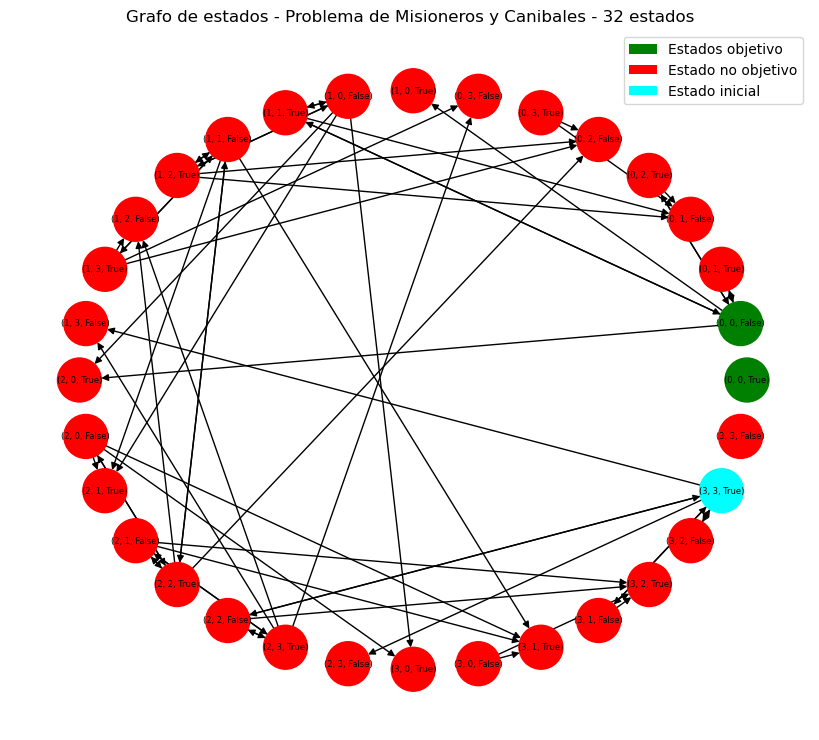

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

g = buildGraph()
G = nx.DiGraph(g)
pos = nx.circular_layout(G)
node_colors = [getColor(e) for e in G.nodes()]

plt.figure(figsize = (8,7))
nx.draw(G,pos,with_labels=True, node_size = 1000, node_color = node_colors, font_size = 6)
legend = [Patch(facecolor='green', label = 'Estados objetivo'),
          Patch(facecolor='red', label = 'Estado no objetivo'),
          Patch(facecolor='cyan', label = 'Estado inicial')]
plt.legend(handles = legend, loc='upper right')
plt.title(f'Grafo de estados - Problema de Misioneros y Canibales - {len(G.nodes())} estados')
plt.show()

Es evidente que algunos nodos no son accesibles, por consoiguiente, se hara una busqueda en anchura para hallar los nodos alcanzables (Usaremos el mismo codigo del ejercicio anterior)

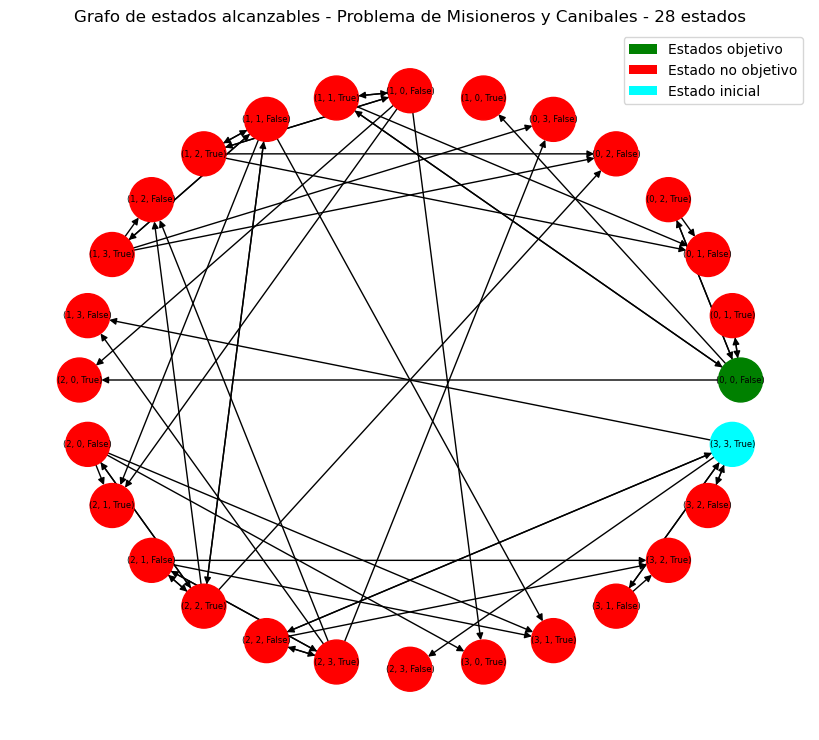

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

g = buildGraph()
reachable = identifyReachable(g,(3,3,True))
g = {a:b for a,b in g.items() if a in reachable}
G = nx.DiGraph(g)
pos = nx.circular_layout(G)
node_colors = [getColor(e) for e in G.nodes()]

plt.figure(figsize = (8,7))
nx.draw(G,pos,with_labels=True, node_size = 1000, node_color = node_colors, font_size = 6)
legend = [Patch(facecolor='green', label = 'Estados objetivo'),
          Patch(facecolor='red', label = 'Estado no objetivo'),
          Patch(facecolor='cyan', label = 'Estado inicial')]
plt.legend(handles = legend, loc='upper right')
plt.title(f'Grafo de estados alcanzables - Problema de Misioneros y Canibales - {len(G.nodes())} estados')
plt.show()

En este contexto, podemos ver que existen 28 estados alcanzables. Como ultimo paso, vamos a hacer una búsqueda en anchura sobre el grafo para determinar la secuencia de estados para cumplir con nuestra tarea

In [10]:
queue = [((3,3,True) , [(3,3,True)])]
covered = set()
path = None
while len(queue)>0:
    state , path = queue.pop(0)
    if isObjective(state):
        print(f'Solución de {len(path) - 1} acciones encontrada')
        break
    if state not in covered:
        for state in g[state]:
            queue.append( (state , path + [state]) )
if path is None: print(f'No se encontró solución')

Solución de 9 acciones encontrada


In [11]:
print(f'Solución encontrada')

for i, state in enumerate(path):
    M,C,P = state
    pos = 'Izquierda' if P else 'Derecha'
    print(f'{i+1}. Misioneros en la izquierda = {M}, Canibales en la izquierda = {C}, Posición canoa = {pos}')

Solución encontrada
1. Misioneros en la izquierda = 3, Canibales en la izquierda = 3, Posición canoa = Izquierda
2. Misioneros en la izquierda = 2, Canibales en la izquierda = 2, Posición canoa = Derecha
3. Misioneros en la izquierda = 2, Canibales en la izquierda = 3, Posición canoa = Izquierda
4. Misioneros en la izquierda = 2, Canibales en la izquierda = 1, Posición canoa = Derecha
5. Misioneros en la izquierda = 2, Canibales en la izquierda = 2, Posición canoa = Izquierda
6. Misioneros en la izquierda = 1, Canibales en la izquierda = 1, Posición canoa = Derecha
7. Misioneros en la izquierda = 1, Canibales en la izquierda = 2, Posición canoa = Izquierda
8. Misioneros en la izquierda = 1, Canibales en la izquierda = 0, Posición canoa = Derecha
9. Misioneros en la izquierda = 1, Canibales en la izquierda = 1, Posición canoa = Izquierda
10. Misioneros en la izquierda = 0, Canibales en la izquierda = 0, Posición canoa = Derecha
